# EDA for Wildfire detection - Part 1 (Handle Missing Values)

In [ ]:
import pandas as pd

from IPython.display import display

In [2]:
from myLib import check_missing, check_column_sources, check_missing_row_overlap, check_missing_and_plot, plot_missing_spatial

## 1. Prepare data resources

Read the following csv files:
- Read Parsed_Table_3 into 'df_table3'
- Read Firegrowth_pts_v1_1_2023 into 'df_cfsds_pts_2023'
- Read modis_2023_Canada into 'df_modis_2023'
- Read viirs-snpp_2023_Canada into 'df_virrs_2023'
(Parsed_Table_3 is the csv version of Table 3 mentioned in "The Canadian Fire Spread Dataset.pdf")

In [3]:
## Read CFSDS pts 2023
path = "../data/Firegrowth_pts_v1_1_2023.csv"
df_cfsds_pts_2023 = pd.read_csv(path)
print(f"Load dataframe from {path}, \nShape: {df_cfsds_pts_2023.shape}")
display(df_cfsds_pts_2023.head())

## Read MODIS 2023 (Canada)
path = "../data/modis_2023_Canada.csv"
df_modis_2023 = pd.read_csv(path)
print(f"Load dataframe from {path}, \nShape: {df_modis_2023.shape}")
display(df_modis_2023.head())

# Read VIIRS 2023 (Canada)
path = "../data/viirs-snpp_2023_Canada.csv"
df_viirs_2023 = pd.read_csv(path)
print(f"Load dataframe from {path}, \nShape: {df_viirs_2023.shape}")
display(df_viirs_2023.head())

Load dataframe from ../data/Firegrowth_pts_v1_1_2023.csv, 
Shape: (9812282, 60)


,ID,DOB,year,fireday,firearea,ecozone,fwi,isi,ffmc,dmc,...,dem,slope,twi,aspect,cumuarea,pctgrowth,prevgrow,sprdistm,lon,lat
0,2023_1,199,2023,6,34.83,4.0,12.689084,3.413085,87.002037,57.022739,...,155.888885,0.635593,8.542518,19.364168,584.01,6.342183,122.31,82.564522,-120.243573,65.162707
1,2023_1,200,2023,7,8.91,4.0,12.562475,3.274614,87.347870,59.742805,...,159.111115,1.295400,8.378138,65.199997,592.92,1.525659,34.83,20.722663,-120.242807,65.161939
2,2023_1,199,2023,6,34.83,4.0,12.689084,3.413085,87.002037,57.022739,...,157.555557,1.379041,8.435522,3.923952,584.01,6.342183,122.31,82.564522,-120.240982,65.162261
3,2023_1,198,2023,5,122.31,4.0,17.889744,5.501473,87.002037,54.540680,...,158.777771,0.873803,8.435522,3.923952,549.18,28.652751,182.25,312.984996,-120.239156,65.162582
4,2023_1,198,2023,5,122.31,4.0,17.889744,5.501473,87.002037,54.540680,...,156.888885,1.153590,8.310710,333.121857,549.18,28.652751,182.25,312.984996,-120.237330,65.162904


Load dataframe from ../data/modis_2023_Canada.csv, 
Shape: (324003, 15)


,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,53.4971,-117.9781,375.0,1.5,1.2,2023-01-02,1915,Terra,MODIS,100,61.03,265.7,0.0,D,0
1,53.4998,-117.9604,361.8,1.5,1.2,2023-01-02,1915,Terra,MODIS,91,61.03,267.0,0.0,D,0
2,53.4929,-117.9582,377.4,1.5,1.2,2023-01-02,1915,Terra,MODIS,100,61.03,266.3,0.0,D,0
3,53.4950,-117.9712,374.5,1.0,1.0,2023-01-02,2048,Aqua,MODIS,100,61.03,267.7,0.0,D,0
4,56.7794,-118.0159,314.9,1.3,1.1,2023-01-03,450,Terra,MODIS,87,61.03,266.6,28.1,N,0


Load dataframe from ../data/viirs-snpp_2023_Canada.csv, 
Shape: (1754727, 15)


,latitude,longitude,bright_ti4,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_ti5,frp,daynight,type
0,58.58209,-122.62513,321.46,0.57,0.43,2023-01-01,957,N,VIIRS,n,2,260.01,5.17,N,0
1,54.41019,-117.53371,339.81,0.39,0.36,2023-01-01,958,N,VIIRS,n,2,263.24,5.02,N,0
2,54.41105,-117.53967,338.31,0.39,0.36,2023-01-01,958,N,VIIRS,n,2,263.12,5.02,N,0
3,54.42263,-117.54747,343.21,0.39,0.36,2023-01-01,958,N,VIIRS,n,2,268.39,14.76,N,0
4,54.42507,-117.54012,337.76,0.39,0.36,2023-01-01,958,N,VIIRS,n,2,262.35,5.15,N,0


In [4]:
# Read CFSDS Table 3
path = "../data/Parsed_Table_3.csv"
df_table3 = pd.read_csv(path)
print(f"Load dataframe from {path}, \nShape: {df_table3.shape}")
display(df_table3.head())

Load dataframe from ../data/Parsed_Table_3.csv, 
Shape: (32, 4)


,attribute,description,mean ± sd,source
0,ID,Fire ID,NaN,NBAC
1,DOB,Day of year burning,203.1 ± 28.5,CFSDS
2,year,Year,2012.5 ± 5.7,NBAC
3,fireday,Day of fire (ignition day -1),219.1 ± 21.1,CFSDS
4,fireera,Fire growth this day (ha),57.4 ± 583.3,CFSDS


## 2. Check missing values for all data sources

### 2.1 Check missing values for CFSDS (2023)


--- Missing Values in CFSDS Pts 2023 ---


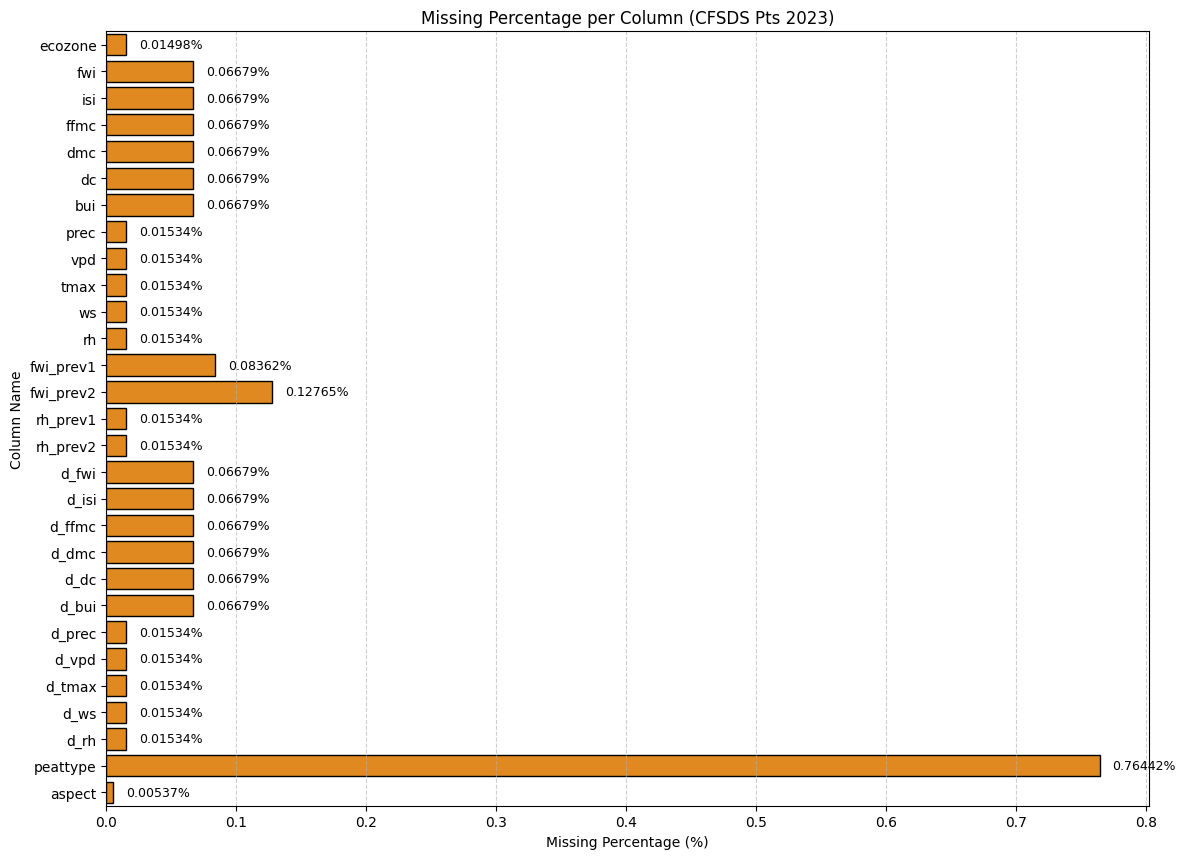

In [5]:
missing_df_cfsds = check_missing_and_plot(df_cfsds_pts_2023, 'CFSDS Pts 2023')

In [6]:
missing_df_cfsds

,DataFrame,Column,Missing Count,Missing %,Dtype
0,CFSDS Pts 2023,ecozone,1470,0.014981,float64
1,CFSDS Pts 2023,fwi,6554,0.066794,float64
2,CFSDS Pts 2023,isi,6554,0.066794,float64
3,CFSDS Pts 2023,ffmc,6554,0.066794,float64
4,CFSDS Pts 2023,dmc,6554,0.066794,float64
5,CFSDS Pts 2023,dc,6554,0.066794,float64
6,CFSDS Pts 2023,bui,6554,0.066794,float64
7,CFSDS Pts 2023,prec,1505,0.015338,float64
8,CFSDS Pts 2023,vpd,1505,0.015338,float64
9,CFSDS Pts 2023,tmax,1505,0.015338,float64


### 2.2 Findings about the missing info:
1. Basic fire info such as ID (Fire ID), DOB (Day of year burning), year (Year), fireday (Day of fire ignition date=1), firearea (Fire growth this day (ha)) are well recorded, no missing values are there.

Types of missing values:
1. Ecozone (Ecozone): code of zone
2. FWI System Variables: (Around 0.066794% of values were missing.)
    - fwi (Fire weather index): Fire weather index

    - isi (Initial spread index): Initial spread index

    - ffmc (Fine Fuel Moisture Code): Fine fuel moisture code

    - dmc (Duff Moisture Code): Duff moisture code

    - dc (Drought code): Drought code; indicates long-term dryness, influenced by root-level moisture and rainfall

    - bui (Buildup index): Buildup index
3. Daily Weather Variables: These variables are from the ERA5-Land dataset (0.015338 % are missing)
    - prec (24-hour precipitation (mm)): Total precipitation over 24 hours from noon to noon, unit: mm

    - vpd (Daily max vapour pressure deficit (hPa)): Daily maximum vapor pressure deficit, unit: hPa

    - tmax (Maximum daily temperature (°C)): Daily max temperature, unit: °C

    - ws (Noon windspeed at 10 m elevation (km/h)): Noon windspeed at 10m above ground, unit: km/h

    - rh (Noon relative humidity (%)): Noon relative humidity, unit: %
4. Previous Day FWI System Variables: These are the FWI variables from previous days
    - fwi_prev1 (Fire weather index from previous day): FWI from one day before

    - fwi_prev2 (Fire weather index from 2 days prior): FWI from two days before

    - rh_prev1 (Noon relative humidity from previous day (%)): Relative humidity from one day before (0.127646)

    - rh_prev2 (Humidity from 2 days prior (%)): Relative humidity from two days before (0.015338)
5. Weather Anomaly Variables: These represent standardized anomalies of weather variables
    - Missing 0.066794%
        - d_fwi (Fire weather index anomaly): Fire weather index anomaly

        - d_isi (Initial spread index anomaly): Initial spread index anomaly

        - d_ffmc (Fine fuel moisture code anomaly): Fine fuel moisture code anomaly

        - d_dmc (Duff moisture code anomaly): Duff moisture code anomaly

        - d_dc (Drought code anomaly): Drought code anomaly

        - d_bui (Buildup index anomaly): Buildup index anomaly (0.066794)
    - Missing 0.015338%
        - d_prec (Precipitation anomaly (mm)): Precipitation anomaly

        - d_vpd (Daily max vapour pressure deficit anomaly (hPa)): Vapor pressure deficit anomaly

        - d_tmax (Maximum daily temperature anomaly (°C)): Max temperature anomaly

        - d_ws (Noon windspeed anomaly (km/h)): Noon windspeed anomaly

        - d_rh (Noon relative humidity anomaly (%)): Noon relative humidity anomaly

### 2.3 Check and handle missing values for CFSDS

In [7]:
df_cfsds_pts_2023_clean = df_cfsds_pts_2023.copy()

#### 2.3.1 Removal of fwi_prev1 and fwi_prev2 (Fire Weather Index - Previous Days)

The variables fwi_prev1 and fwi_prev2 represent the fire weather index values from one and two days prior, respectively.
We observe a logically increasing missing rate: <br>
- fwi: ~6.7% missing
- fwi_prev1: ~8.4% missing
- fwi_prev2: ~12.7% missing

This suggests a typical backfilling limitation in temporal data, as older days are more likely to be unavailable in the dataset.
Since the current analysis does not yet require explicit time-series modeling, and the current-day fwi values are already sufficient for most inferences, we choose to remove fwi_prev1 and fwi_prev2 for now.
These columns can be reconstructed later if needed using groupby and shift operations on the fwi variable.

Action: Drop fwi_prev1 and fwi_prev2

In [8]:
df_cfsds_pts_2023_clean = df_cfsds_pts_2023_clean.drop(columns=['fwi_prev1', 'fwi_prev2'])

#### 2.3.2 Analysis of rh, rh_prev1, rh_prev2 and Decision to Remove RH Variables

The variables rh, rh_prev1, and rh_prev2 are meant to represent relative humidity at noon for the current day, the previous day, and two days ago.
However, we observe that all three columns share exactly the same missing rate (~1.53%), which is inconsistent with the expected pattern.
Ideally, the missing rate should increase with the temporal lag (e.g., rh_prev2 > rh_prev1 > rh), just like in the FWI group.

This anomaly suggests either:
- The previous day RH values were generated in a batch process that masked their temporal dependence, or
- The shifting operation used in pre-processing was not properly aligned with time indices.

In light of this inconsistency, and to avoid potentially misleading features, we opt to temporarily remove all RH-related variables from the current analysis.

Action: Drop rh, rh_prev1, rh_prev2

In [9]:
df_cfsds_pts_2023_clean = df_cfsds_pts_2023_clean.drop(columns=['rh', 'rh_prev1', 'rh_prev2'])

#### 2.3.3 Removal of peattype Due to Excessive Missingness and Lack of Relevance

The variable peattype represents peatland classification, but it exhibits extremely high missingness (~76%).
Given that our current objectives do not involve peatland-specific fire modeling or soil classification, retaining this column would add noise and unnecessary sparsity to our feature set.

As a result, we decide to remove peattype entirely from the dataset.

Action: Drop peattype


In [10]:
df_cfsds_pts_2023_clean = df_cfsds_pts_2023_clean.drop(columns=['peattype'])

- Check missing value distribution again


--- Missing Values in CFSDS Pts 2023 ---


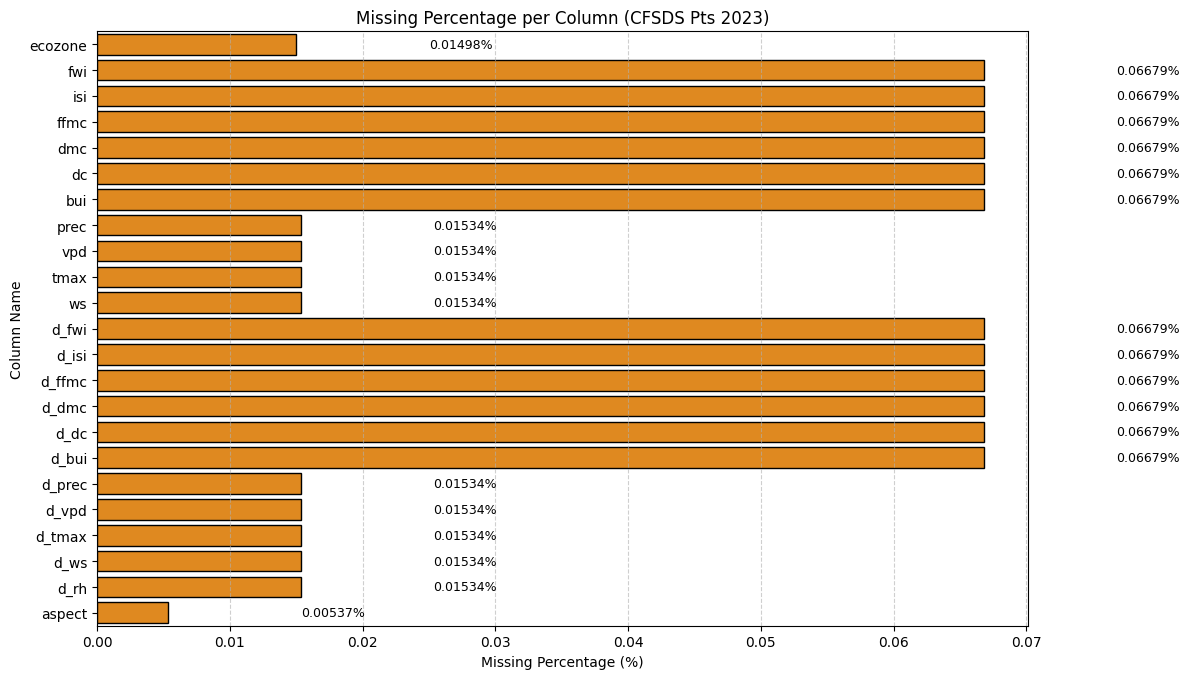

In [11]:
missing_df_cfsds_clean = check_missing_and_plot(df_cfsds_pts_2023_clean, 'CFSDS Pts 2023')

#### 2.3.4 Missing Value Spatial Analysis: ecozone

c:\Users\Madalina\OneDrive - Conestoga College\Conestoga\May-August\Case Studies\wildfire_detection\venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


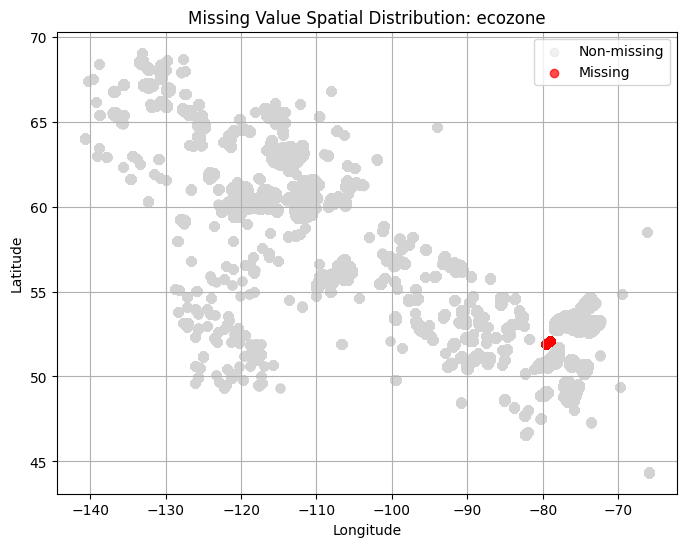

In [12]:
plot_missing_spatial(df_cfsds_pts_2023_clean, ['ecozone'])


- Observation: Missing values for the ecozone column are spatially concentrated in southern Ontario, around longitude -80 and latitude 50.
- Possible Reason: According to the data source (ESWG 1996), this area may fall along the boundary of ecological zones or in transitional regions such as urban or agricultural land, which are not clearly assigned to any forest ecozone.
- Action: Since the missing rate is extremely low (~0.015%) and geographically localized, these missing values likely result from inherent gaps in classification rather than data corruption.

In [13]:
df_cfsds_pts_2023_clean = df_cfsds_pts_2023_clean.dropna(subset=['ecozone'])

#### 2.3.5 Missing Value Spatial Analysis: aspect
- Observation: Missing values for aspect appear in two distinct regions:
	1.	Northwestern remote area (longitude ~ -130, latitude ~ 69);
	2.	Eastern forest edge (longitude ~ -80, latitude ~ 46).
- Possible Reason: As aspect is derived from the ASTER Global DEM, missing values may be due to:
    1. Terrain data not being available for those specific locations;
	2. Flat or water-dominated regions where slope direction (aspect) cannot be defined.
- Action: Despite a very low missing rate (~0.005%), these gaps are geographically clustered and likely reflect data limitations in terrain modeling.

c:\Users\Madalina\OneDrive - Conestoga College\Conestoga\May-August\Case Studies\wildfire_detection\venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


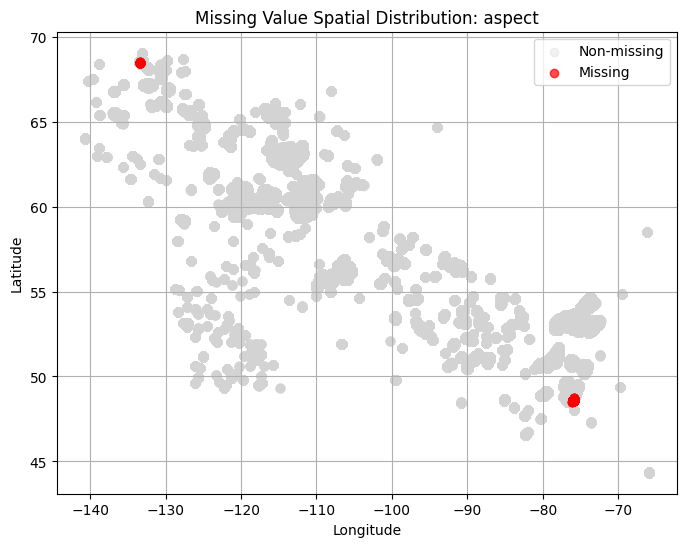

In [14]:
plot_missing_spatial(df_cfsds_pts_2023_clean, ['aspect'])

In [15]:
df_cfsds_pts_2023_clean = df_cfsds_pts_2023_clean.dropna(subset=['aspect'])

- Check missing value distribution again


--- Missing Values in CFSDS Pts 2023 ---


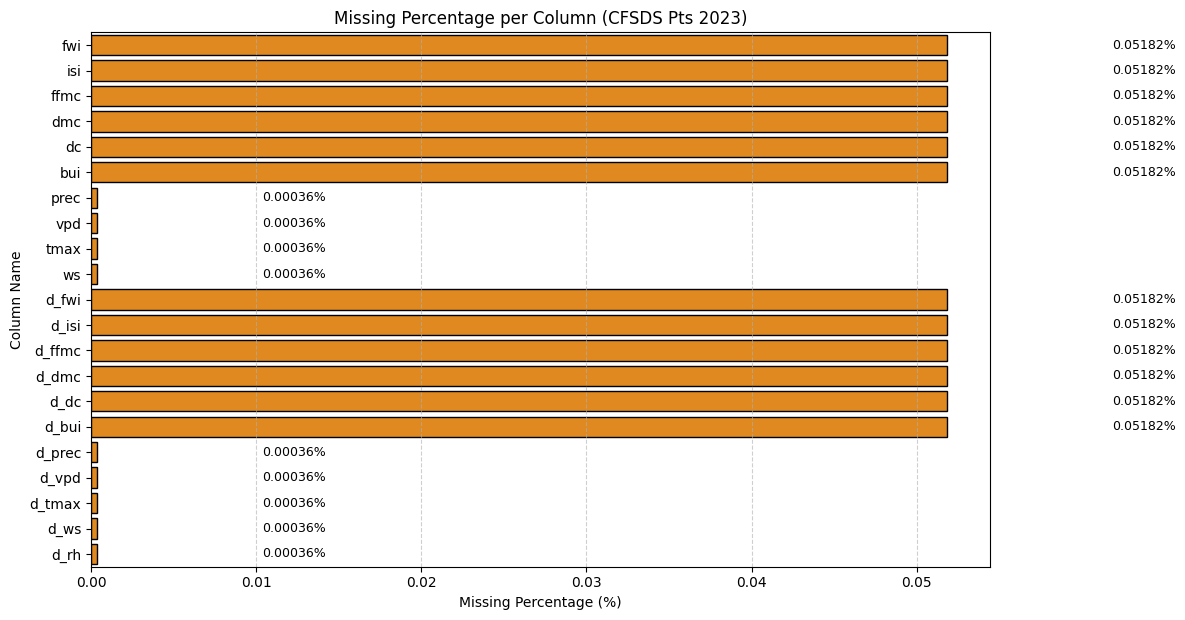

In [16]:
missing_df_cfsds_clean = check_missing_and_plot(df_cfsds_pts_2023_clean, 'CFSDS Pts 2023')

#### 2.3.6 Handle group missing values (Group A/B)
- Group A
These value consistently missing (0.05182%) numbers: <br>
['fwi', 'isi', 'ffmc', 'dmc', 'dc', 'bui', 'd_fwi', 'd_isi', 'd_ffmc', 'd_dmc', 'd_dc', 'd_bui']
- Group B
These value consistently missing (0.00036%) numbers: <br>
['prec', 'vpd', 'tmax', 'ws', 'd_prec', 'd_vpd', 'd_tmax', 'd_ws', 'd_rh']

In [17]:
# Group A variables
group_a_cols = ['fwi', 'isi', 'ffmc', 'dmc', 'dc', 'bui',
                'd_fwi', 'd_isi', 'd_ffmc', 'd_dmc', 'd_dc', 'd_bui']

# Group B variables
group_b_cols = ['prec', 'vpd', 'tmax', 'ws',
                'd_prec', 'd_vpd', 'd_tmax', 'd_ws', 'd_rh']

In [18]:
# Run overlap check for Group B
group_b_result = check_missing_row_overlap(df_cfsds_pts_2023_clean, group_b_cols, "Group B")

# Run overlap check for Group A
group_a_result = check_missing_row_overlap(df_cfsds_pts_2023_clean, group_a_cols, "Group A")


Group B Missing Row Check:
Total unique rows with at least one missing value: 35
Total rows missing in ALL columns: 35
All missing values occur on the same rows.

Group A Missing Row Check:
Total unique rows with at least one missing value: 5084
Total rows missing in ALL columns: 5084
All missing values occur on the same rows.


Thus, both GroupA and GroupB contains from a set of rows.

- Check the data sources for group A/B

In [19]:
# df_table3 is the parsed version of Table 3 with 'attribute' and 'source' columns
group_a_sources, group_a_map = check_column_sources(group_a_cols, df_table3)
group_b_sources, group_b_map = check_column_sources(group_b_cols, df_table3)

# Print summary
print("Group A sources:", group_a_sources)
print("Group B sources:", group_b_sources)

# Print mapping for inspection
print("\nGroup A Mapping:")
for k, v in group_a_map.items():
    print(f"{k:10}: {v}")

print("\nGroup B Mapping:")
for k, v in group_b_map.items():
    print(f"{k:10}: {v}")

Group A sources: {'CFSDS*, ERA5-Land*'}
Group B sources: {'CFSDS*, ERA5-Land*'}

Group A Mapping:
fwi       : CFSDS*, ERA5-Land*
isi       : CFSDS*, ERA5-Land*
ffmc      : CFSDS*, ERA5-Land*
dmc       : CFSDS*, ERA5-Land*
dc        : CFSDS*, ERA5-Land*
bui       : CFSDS*, ERA5-Land*
d_fwi     : CFSDS*, ERA5-Land*
d_isi     : CFSDS*, ERA5-Land*
d_ffmc    : CFSDS*, ERA5-Land*
d_dmc     : CFSDS*, ERA5-Land*
d_dc      : CFSDS*, ERA5-Land*
d_bui     : CFSDS*, ERA5-Land*

Group B Mapping:
prec      : CFSDS*, ERA5-Land*
vpd       : CFSDS*, ERA5-Land*
tmax      : CFSDS*, ERA5-Land*
ws        : CFSDS*, ERA5-Land*
d_prec    : CFSDS*, ERA5-Land*
d_vpd     : CFSDS*, ERA5-Land*
d_tmax    : CFSDS*, ERA5-Land*
d_ws      : CFSDS*, ERA5-Land*
d_rh      : CFSDS*, ERA5-Land*


- Plot spatial information for Group A/B

c:\Users\Madalina\OneDrive - Conestoga College\Conestoga\May-August\Case Studies\wildfire_detection\venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


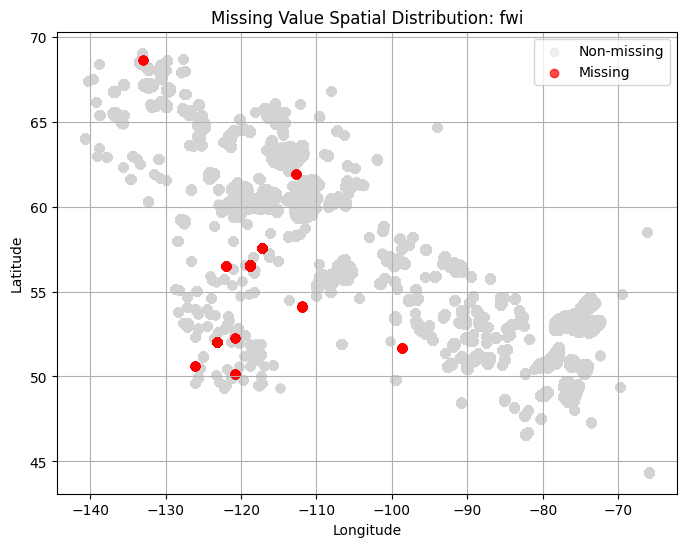

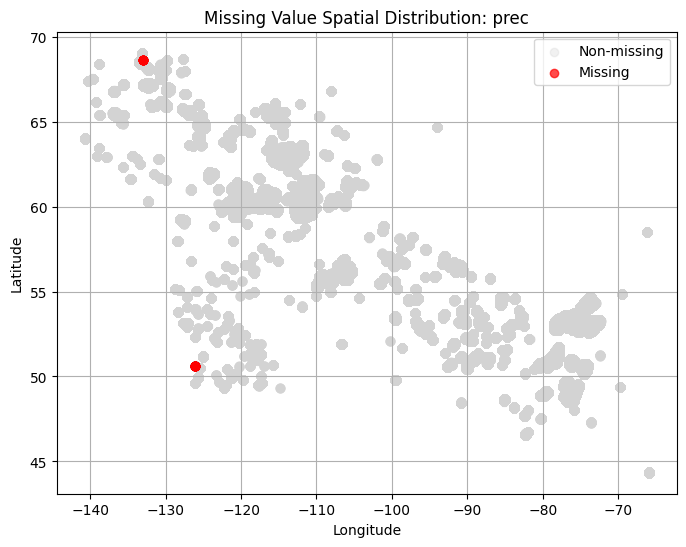

In [20]:
plot_missing_spatial(df_cfsds_pts_2023_clean, [group_a_cols[0]])
plot_missing_spatial(df_cfsds_pts_2023_clean, [group_b_cols[0]])

##### Group A (Fire Weather Index & Anomalies)

- Observations:
    1. All 5,084 rows with missing values in Group A are identical across all columns in the group.
	2. The missing points are spatially clustered (as seen in the fwi plot) — these regions likely represent areas where FWI system variables were not applicable or not available, e.g., non-forested, sparsely monitored, or edge zones.

- Recommendation:
	1. Since FWI-related variables are model-derived and critical for fire risk assessment, and their missing values are not random, imputation is not recommended.
	2. Action: Drop these rows altogether to preserve data integrity when analyzing fire weather indices.

In [21]:
df_cfsds_pts_2023_clean = df_cfsds_pts_2023_clean.dropna(subset=group_a_cols)

##### Group B (ERA5-Land Daily Weather Variables & Anomalies)

- Observations:
    1. Only 35 rows have missing values.
	2. Just like Group A, these missing values overlap perfectly across Group B columns.
	3. Spatial visualization (e.g., for prec) shows these are isolated and scattered, not spatially concentrated.

- Recommendation:
    1. The number of missing rows is very small (<0.05%) and appears random.
	2. Action: Drop these 35 rows directly. It’s simple, avoids imputation bias, and the data loss is negligible.

In [22]:
df_cfsds_pts_2023_clean = df_cfsds_pts_2023_clean.dropna(subset=group_b_cols)

#### 2.3.7 Check missing values again - Make sure no missing values in df_cfsds_pts_2023_clean

In [23]:
missing_df_cfsds_clean = check_missing_and_plot(df_cfsds_pts_2023_clean, 'CFSDS Pts 2023')


--- Missing Values in CFSDS Pts 2023 ---
No missing values found.


#### 2.3.8 Save cleaned DataFrame to CSV

In [28]:
# Save cleaned DataFrame to CSV
path = "../output/df_cfsds_pts_2023_clean.csv"
df_cfsds_pts_2023_clean.to_csv(path, index=False)

print(f"Saved cleaned DataFrame to {path}")

Saved cleaned DataFrame to ../output/df_cfsds_pts_2023_clean.csv


### 2.4 Check and handle missing values for "MODIS 2023"

In [26]:
missing_df_modis = check_missing(df_modis_2023, 'MODIS 2023')


--- Missing Values in MODIS 2023 ---
No missing values found.


### 2.5 Check and handle missing values for "VIIRS 2023"

In [27]:
missing_df_viirs = check_missing(df_viirs_2023, 'VIIRS 2023')


--- Missing Values in VIIRS 2023 ---
No missing values found.


## 3. Summary
This report analyzes wildfire datasets, including fire points from CFSDS, MODIS, and VIIRS in Canada during 2023. Among these, only the CFSDS CSV file contains missing values. We thoroughly investigated these missing values and removed most of them.

---